In [1]:
%config IPCompleter.greedy=True

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Exercise 9

## ISL 3.7 / exercise 13

Let's create `x` vector over normal distribution $N(0, 1)$ and `eps` vector over $N(0, 0.25)$ and then compute $Y = -1 + 0.5X + \epsilon$

**(a) - (b)**

In [331]:
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.25, 100)

**(c)**

In [332]:
y = -1.0 + 0.5 * x + eps

$\beta_0 = -1$
$\beta_1 = 0.5$

Length of $y$ vector:

In [333]:
print(np.linalg.norm(y))

11.02803449477621


**(d)**

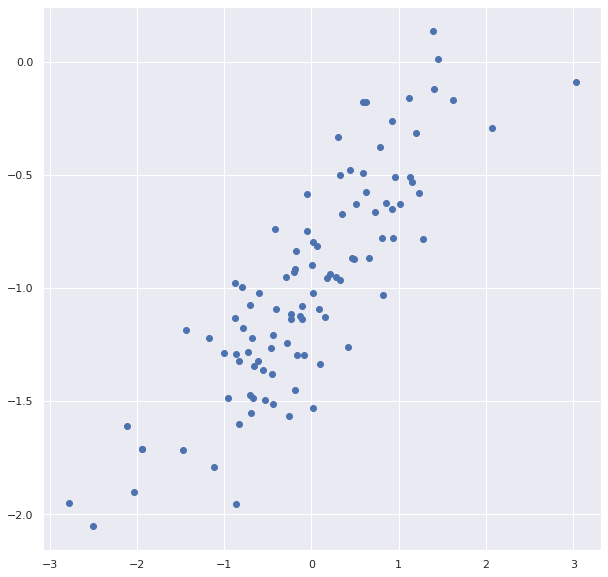

In [334]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)

Układ punktów i sposób, w jaki są skoncentrowane, wskazuje, że istnieje pewna zależność pomiędzy $x$ a $y$.

**(e)**

In [335]:
ls_model = smf.ols(formula='y ~ x', data=pd.DataFrame({ 'x': x, 'y': y })).fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     254.0
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           5.82e-29
Time:                        23:18:40   Log-Likelihood:                -4.1865
No. Observations:                 100   AIC:                             12.37
Df Residuals:                      98   BIC:                             17.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9721      0.026    -38.087      0.0

Predicted coefficients:

$\hat{\beta_0} = -0.9709$
$\hat{\beta_1} = 0.5344$

Widać, że estymacja dla $\beta_0$ i $\beta_1$ jest zbliżona do ich prawdziwych wartości (czyli, odpowiednio, $-1$ oraz $0.5$), aczkolwiek możemy zauważyć pewne _przeestymowanie_, tzn. wyznaczone wartości są nieco większe od tych prawdziwych.

**(f)**

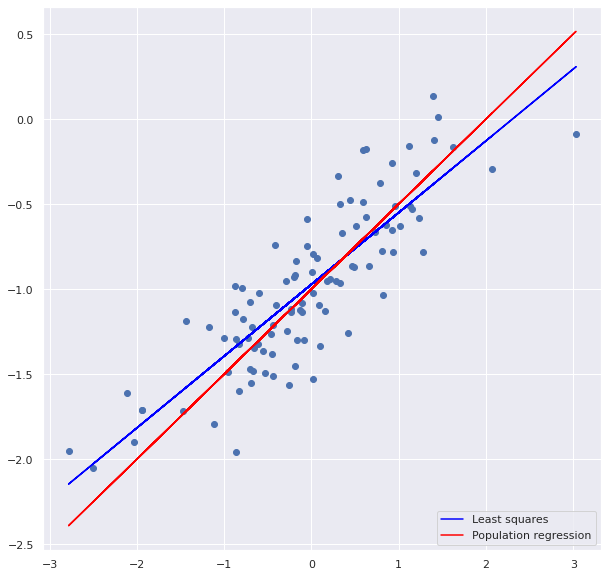

In [336]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, ls_model.predict(), color='blue', label='Least squares')
plt.plot(x, -1.0 + 0.5*x, color='red', label='Population regression')
plt.legend(loc='lower right')

**(g)**

In [337]:
poly_model = smf.ols(formula='y ~ x + np.square(x)', data=pd.DataFrame({ 'x': x, 'y': y })).fit()
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     125.8
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.12e-27
Time:                        23:18:40   Log-Likelihood:                -4.1424
No. Observations:                 100   AIC:                             14.28
Df Residuals:                      97   BIC:                             22.10
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9766      0.030    -32.710   

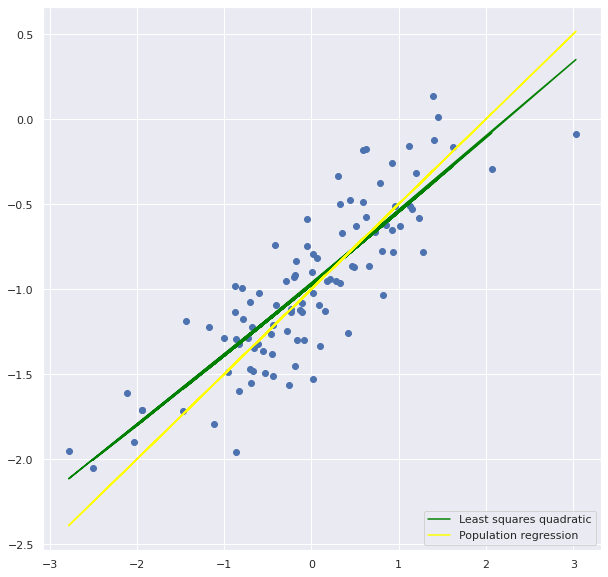

In [338]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, poly_model.predict(), color='green', label='Least squares quadratic')
plt.plot(x, -1.0 + 0.5*x, color='yellow', label='Population regression')
plt.legend(loc='lower right')

Estymacja dla $\beta_0$ nie rózni się zbytnio dla poprzedniego modelu. Współczynnik $\beta_1$ jest nieco niedoestymowany. Nastomiast niewielka wartość współczynnika $\hat{\beta_2}$ przy $x^2$ powoduje, że krzywa wyznaczana przez model tylko nieco odbiega od krzywej wyznaczonej, gdy braliśmy pod uwagę funkcję liniową. Wartość p-value dla tej zmiennej mówi ponadto, że można ją traktować jako losowy szum. Patrząc na wartość współczynnika $R^2$, który jest miarą dopasowania się modelu do danych, można zauważyć, że wprowadzenie dodatkowej zmiennej $x^2$ nie wpłynęło na jego wartość, zatem nie spowodowało nam to redukcji błędu dopasowania modelu do danych. Możemy zatem podsumować, że wprowadzenie $x^2$ nie wpłynęło na poprawę jakości modelu.

**(h)** Podobna analiza jak dla (a) - (f), ale z większym _mniejszym_ w danych.

In [339]:
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.05, 100) # lower variance to reduce noise in data
y = -1 + 0.5*x + eps

In [340]:
ls_model = smf.ols(formula='y ~ x', data=pd.DataFrame({ 'x': x, 'y': y })).fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.196e+04
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          3.14e-104
Time:                        23:18:40   Log-Likelihood:                 160.46
No. Observations:                 100   AIC:                            -316.9
Df Residuals:                      98   BIC:                            -311.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0011      0.005   -203.774      0.0

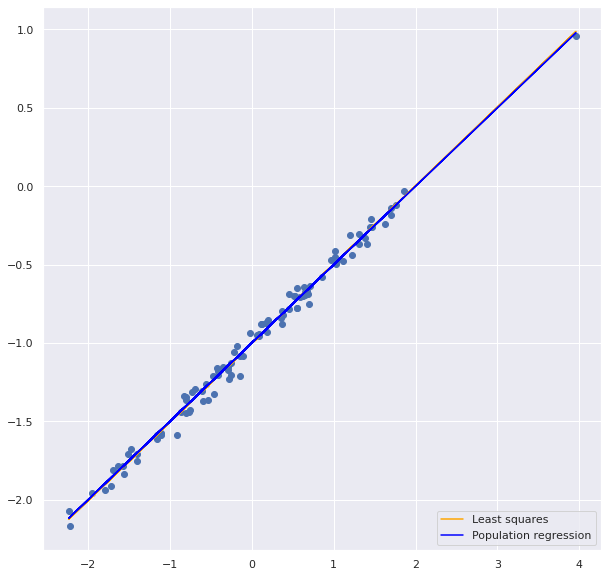

In [341]:
plt.figure(figsize=(10, 10))
plt.scatter(x, y)
plt.plot(x, ls_model.predict(), color='orange', label='Least squares')
plt.plot(x, -1.0 + 0.5*x, color='blue', label='Population regression')
plt.legend(loc='lower right')

Obserwując wartość współczynnika $R^2$ widzimy, że jego wartośc wzrosła w porównaniu do poprzedniego zbioru danych, zatem model jest lepiej dopasowany. Widać to również po koncentracji danych względem wyznaczonej prostej na przedstawionym powyżej wykresie.

**(i)** Powtórzona analiza, ale tym razem z większym _szumem_ w danych

In [342]:
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.5, 100) # greater variance to increase noise in data
y = -1 + 0.5*x + eps

In [343]:
ls_model = smf.ols('y ~ x', data=pd.DataFrame({ 'x': x, 'y': y })).fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     119.5
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.16e-18
Time:                        23:18:40   Log-Likelihood:                -64.444
No. Observations:                 100   AIC:                             132.9
Df Residuals:                      98   BIC:                             138.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9466      0.047    -20.322      0.0

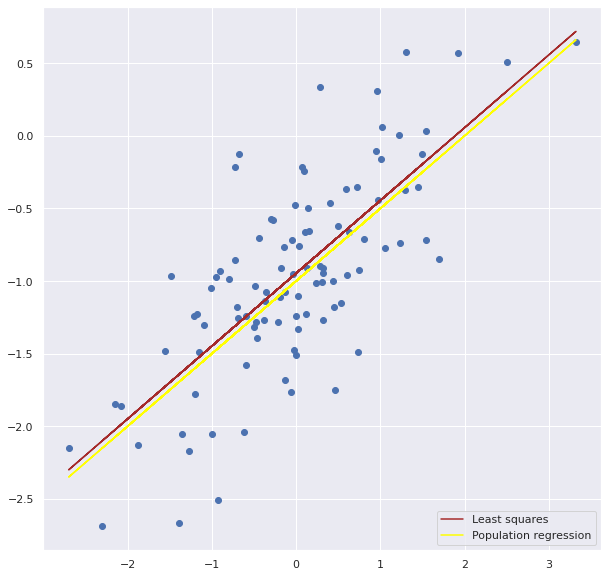

In [344]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, ls_model.predict(), color='brown', label='Least squares')
plt.plot(x, -1.0 + 0.5*x, color='yellow', label='Population regression')
plt.legend(loc='lower right')

Wartość $R^2$ zmalała, a zatem model słabiej dopasował się do danych. Widać to na przedstawionym wykresie.

**(j)**

Zwiększenie _szumu_ w w zbiorze danych zwiększyło _confidence interval_ (przedział pewności???).

## ISL 3.7 / exercise 14

**(a)**

In [345]:
np.random.seed(1)
x_1 = np.random.uniform(size=100)
x_2 = 0.5 * x_1 + np.random.randn(100) / 10
y = 2 + 2 * x_1 + 0.3 * x_2 + np.random.randn(100)

Linear model: $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 + \hat{\epsilon}$

$\hat{\beta_0} = 2$,
$\hat{\beta_1} = 2$,
$\hat{\beta_2} = 0.3$

**(b)**

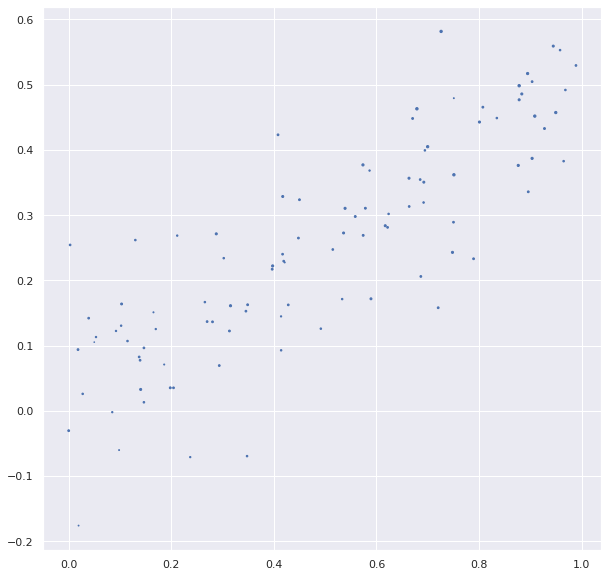

In [346]:
plt.figure(figsize=(10,10))
plt.scatter(x=x_1, y=x_2, s=y)

In [347]:
corr_coeff = np.corrcoef(x_1, x_2)[0][1]
print(corr_coeff)

0.8390596222844917


Na podstawie zaprezentowanego wykresu widać zależność pomiędzy zmiennymi $x_1$ oraz $x_2$. Na jego podstawie możemy wnioskować, że jest to jakaś zależność liniowa z dużą wariancją. Ponadto, współczynnik korelacji pomiędzy $x_1$ a $x_2$ wynosi $\approx 0.839$.

**(c)**

Przyjmijmy w tym punkcie dwie hipotezy zerowe: $H_0^{\beta_1}: \beta_1 = 0$ oraz $H_0^{\beta_2}: \beta_2 = 0$.

In [348]:
df = pd.DataFrame({ 'x_1': x_1, 'x_2': x_2, 'y': y })

In [349]:
ls_model = smf.ols(formula='y ~ x_1 + x_2', data=df).fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           4.40e-07
Time:                        23:18:41   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.0

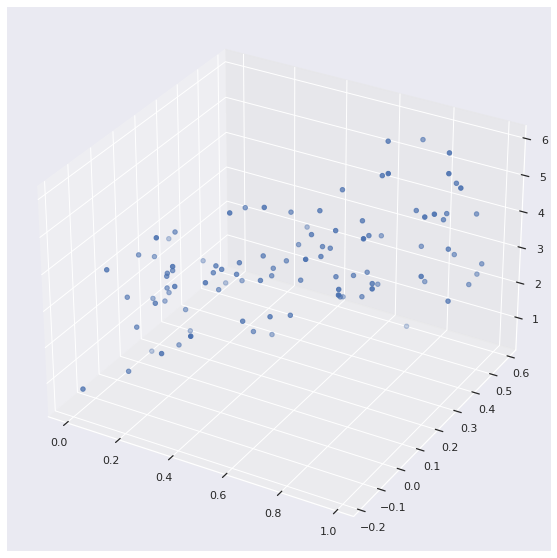

In [350]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x_1'], df['x_2'], df['y'])

Możemy zauważyć, że:

$\hat{\beta_0} = 2.1893$
$\hat{\beta_1} = 0.7046$
$\hat{\beta_2} = 2.5024$

Widzimy tutaj, że $\beta_0 = 2$ została wyestymowana dosyć dokładnie, natomiast wysteymowane wartości dla $\beta_1 = 2$ oraz $\beta_2 = 0.3$ znacznie odbiegają od tych rzeczywistych. 

Na podstawie wyestymowanych wartośći $\hat{\beta_1}$ i $\hat{\beta_2}$ nie możemy obalić hipotezy $H_0^{\beta_1}$, ale możemy za to obalić drugą z nich - $H_0^{\beta_2}$.

**(d)**

Estymacja jedynie na podstawie $x_1$.

In [351]:
df = pd.DataFrame({ 'x_1': x_1, 'x_2': x_2, 'y': y })

In [352]:
ls_model = smf.ols(formula='y ~ x_1', data=df).fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           6.68e-07
Time:                        23:18:41   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.0

Możemy zauważyć, że $\hat{\beta_0} = 2.2486$ i $\hat{\beta_1} = 1.8770$ zatem są one już bliższe wartośći realnych (dla obu jest to 2). Poprawiła się zatem estymacja $\beta_1$. Na podstawie p-value możemy stwierdzić, że hipoteza zerowa $H_0: \beta_1 = 0$ może zostać obalona.

**(e)**

Estymacja jedynie na podstawie $x_2$.

In [353]:
ls_model = smf.ols(formula='y ~ x_2', data=df).fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.09e-07
Time:                        23:18:41   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.0

Widzimy, że $\hat{\beta_0} = 2.2655$ i $\hat{\beta_2} = 3.5613$, zatem dosyć mocno został przeestymowany współczynnik $\beta_2 = 0.3$. Na podstawie tego modelu i wartości p-value, można odrzucić $H_0: \beta_2 = 0$.

**(f)**

Tak, widzimy sprzeczność pomiędzy wynikami zwracanymi przez poszczególne modele. Należy tutaj spojrzeć na wartości p-value dla poszczególnych modeli. Zauważamy, że dla $H_0: \beta_1 = 0$ na podstawie modelu c) należałoby ją zaakceptować, ale już na podstawie modelu d) ta hipoteza może zostać obalona.

Tę obserwację możemy wytłumaczyć poprzez współlinowość $x_1$ i $x_2$ przez co przewidywanie na podstawie tylko jednej zmiennej powoduje błędy.

**(g)**

In [354]:
df = df.append({ 'x_1': 0.1, 'x_2': 0.8, 'y': 6}, ignore_index=True)

In [355]:
model_c = smf.ols(formula='y ~ x_1 + x_2', data=df).fit()
print(model_c.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           5.51e-08
Time:                        23:18:41   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.0

Dla tego modelu wprowadzenie dodatkowych wartości spowodowało wzrot p-value dla $\beta_1$ co sugeruje nam, że zaakceptowanie hipotezy zerowej było błędne.

In [356]:
model_d = smf.ols(formula='y ~ x_1', data=df).fit()
print(model_d.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           9.15e-06
Time:                        23:18:41   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.0

In [357]:
model_e = smf.ols(formula='y ~ x_2', data=df).fit()
print(model_e.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           7.41e-09
Time:                        23:18:41   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.0

Dodatkowo, rozszerzenie zbioru danych spowodowało pogorszenie estymacji dla współczynników.

# Execrcies 10

**(a)**

In [362]:
data = pd.read_csv('./data/Auto.csv')

In [363]:
data['origin'].astype('category')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [365]:
model = smf.ols('mpg ~ horsepower', data=data).fit()

In [366]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     12.60
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           2.79e-64
Time:                        23:44:32   Log-Likelihood:                -1065.5
No. Observations:                 397   AIC:                             2319.
Df Residuals:                     303   BIC:                             2694.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.5941      0.98

**(b)**

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='year', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>,
        <AxesSubplot:xlabel='year', ylabel='cylinders'>,
        <AxesSubplot:xlabel='origin', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='cylinders', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
  

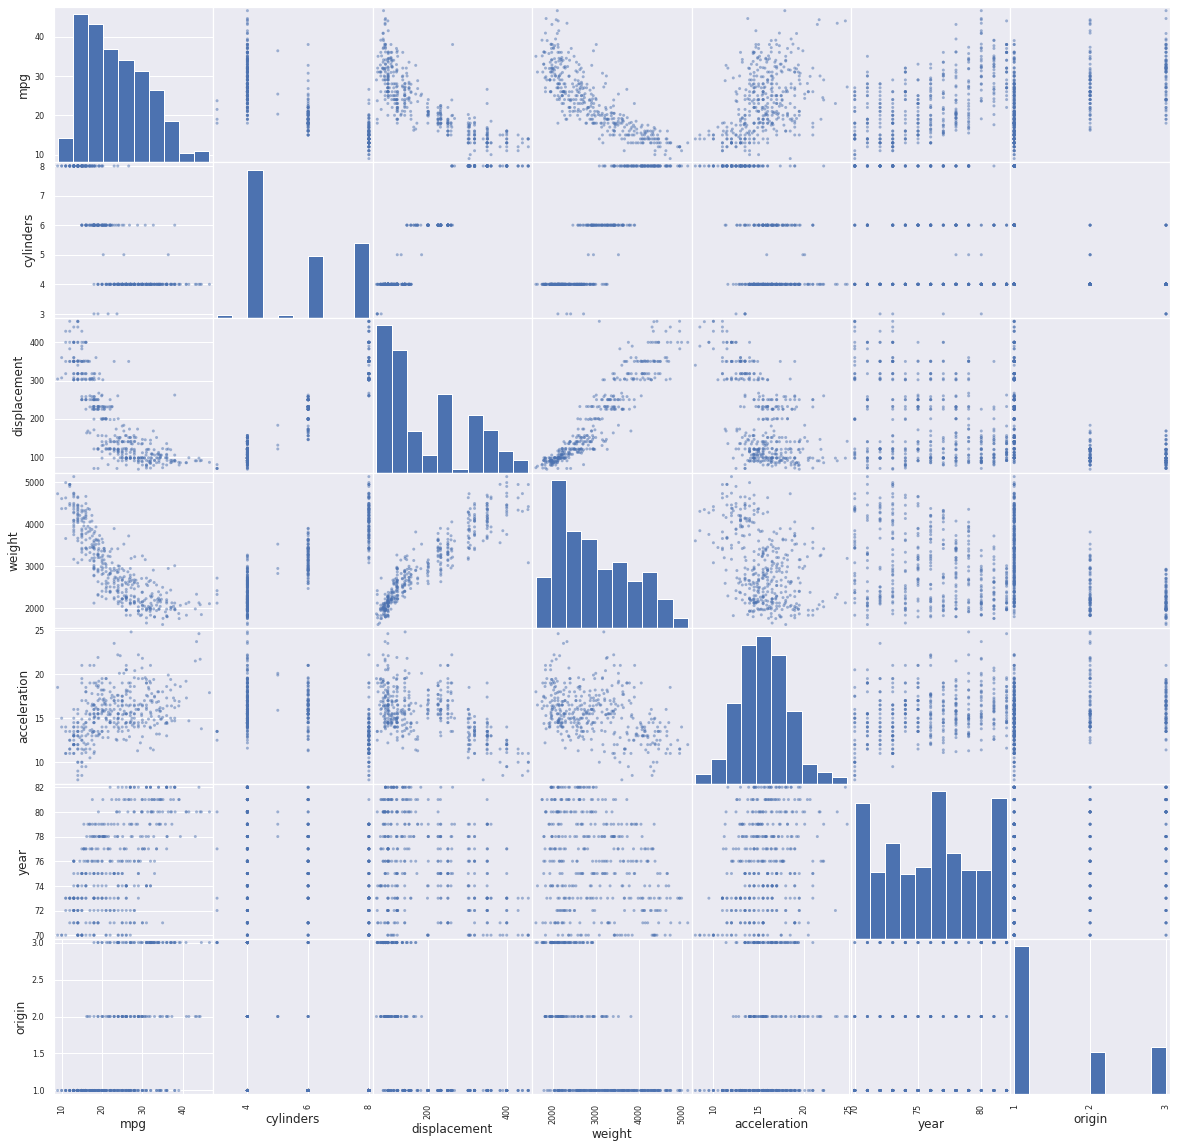

In [370]:
pd.plotting.scatter_matrix(data, figsize=(20, 20))

In [371]:
data.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000
